# Imputing Missing Data with MICE
Mutliple Iterations with Chained Equations

In [2]:
import warnings
warnings.filterwarnings('ignore')

import sys
sys.path.append('../')

from src.visualization import visualize
from src.processing import impute

%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.colors import LogNorm, ListedColormap, LinearSegmentedColormap

import seaborn as sns

import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 200)
import scipy
import math
import statsmodels.api as sm

from datetime import datetime, timedelta

# Data Import
For each imputation method, we have two datasets we consider:
1. Example data to test the accuracy of the model
2. Remaining participant data that we can apply the model to. 

In [3]:
imp = impute.Impute("rnse61g4","../",consecutive=True)

Percent: 10
Parameter: co2
Period (in minutes): 120


## Missing Data

In [4]:
imp.missing.head()

,pm2p5_mass,tvoc,temperature_c,rh,co2
timestamp,,,,,
2020-06-11 13:52:00,22.713558,123.859636,24.037599,42.064286,1412.201879
2020-06-11 13:54:00,22.796582,126.481339,24.077255,42.061364,1411.594738
2020-06-11 13:56:00,22.721861,129.038577,24.113462,42.058696,1410.994147
2020-06-11 13:58:00,22.634113,131.539410,24.146652,42.056250,1410.628738
2020-06-11 14:00:00,22.695872,133.807650,24.177187,42.054000,1409.933588


## Base Data
Same dataset with nothing missing - to compare against.

In [5]:
imp.base.head()

,pm2p5_mass,tvoc,temperature_c,rh,co2
timestamp,,,,,
2020-06-11 13:52:00,22.713558,123.859636,24.037599,42.064286,1412.201879
2020-06-11 13:54:00,22.796582,126.481339,24.077255,42.061364,1411.594738
2020-06-11 13:56:00,22.721861,129.038577,24.113462,42.058696,1410.994147
2020-06-11 13:58:00,22.634113,131.539410,24.146652,42.056250,1410.628738
2020-06-11 14:00:00,22.695872,133.807650,24.177187,42.054000,1409.933588


---

# Imputing

## MICE

In [6]:
imp.mice()

In [7]:
imp.mice_imputed.head()

,pm2p5_mass,tvoc,temperature_c,rh,co2
timestamp,,,,,
2020-06-11 13:52:00,22.713558,123.859636,24.037599,42.064286,1412.201879
2020-06-11 13:54:00,22.796582,126.481339,24.077255,42.061364,1411.594738
2020-06-11 13:56:00,22.721861,129.038577,24.113462,42.058696,1410.994147
2020-06-11 13:58:00,22.634113,131.539410,24.146652,42.056250,1410.628738
2020-06-11 14:00:00,22.695872,133.807650,24.177187,42.054000,1409.933588
...,...,...,...,...,...
2020-08-21 13:56:00,22.967623,482.896681,24.910023,39.131579,722.798423
2020-08-21 13:58:00,23.259189,481.608827,24.910023,39.111111,722.588880
2020-08-21 14:00:00,23.578982,480.518230,24.910023,39.117647,722.321311


## missForest

In [44]:
imp.miss_forest()

In [46]:
imp.rf_imputed.head()

,pm2p5_mass,tvoc,temperature_c,rh,co2
timestamp,,,,,
2020-06-11 13:52:00,22.713558,123.859636,24.037599,42.064286,1412.201879
2020-06-11 13:54:00,22.796582,126.481339,24.077255,42.061364,1411.594738
2020-06-11 13:56:00,22.721861,129.038577,24.113462,42.058696,1410.994147
2020-06-11 13:58:00,22.634113,131.539410,24.146652,42.056250,1410.628738
2020-06-11 14:00:00,22.695872,133.807650,24.177187,42.054000,1409.933588
...,...,...,...,...,...
2020-08-21 13:56:00,22.967623,482.896681,24.910023,39.131579,722.798423
2020-08-21 13:58:00,23.259189,481.608827,24.910023,39.111111,722.588880
2020-08-21 14:00:00,23.578982,480.518230,24.910023,39.117647,722.321311


## GANs
Some nice resources:
- [GANs with PyTorch](https://realpython.com/generative-adversarial-networks/)
- [GANs with TensorFlow](https://stackabuse.com/introduction-to-gans-with-python-and-tensorflow/)

In [10]:
imp.gans()

# Evaluating

In [19]:
imp.evaluate(imp.mice_imputed,"co2")

(0.9254547942095923, 22.055977326604197, 89.9414268486062, 0.9803446346072062)

# Simulating
Now we can run through multiple iterations of missing data to get a sense of the model's performance.

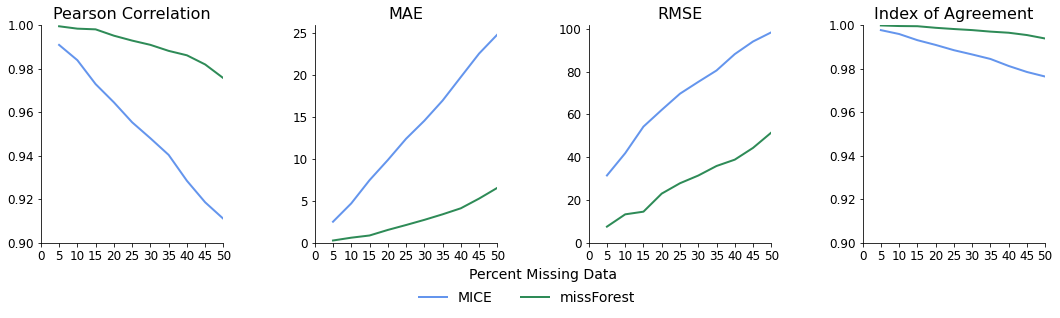

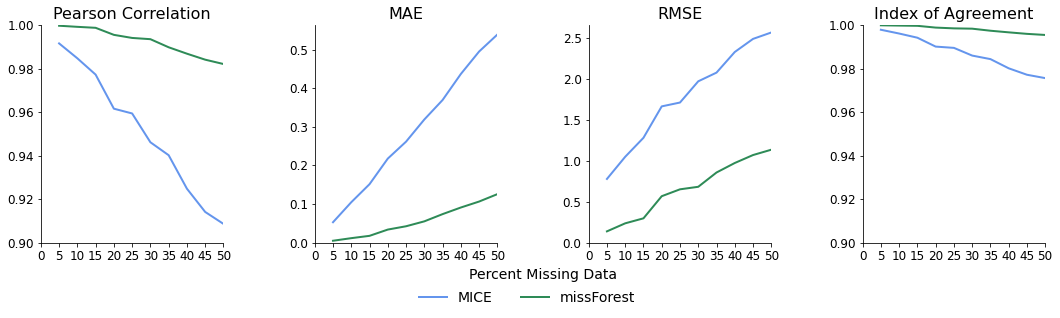

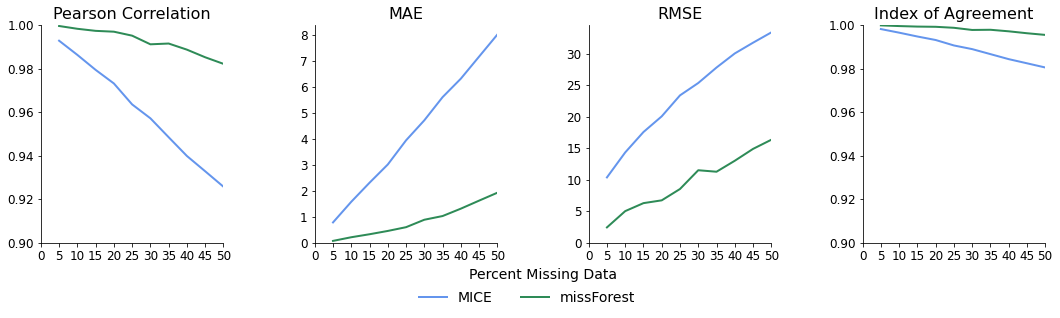

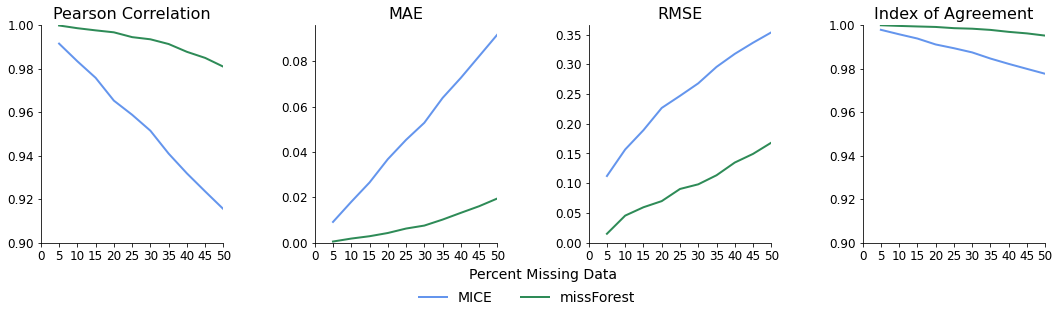

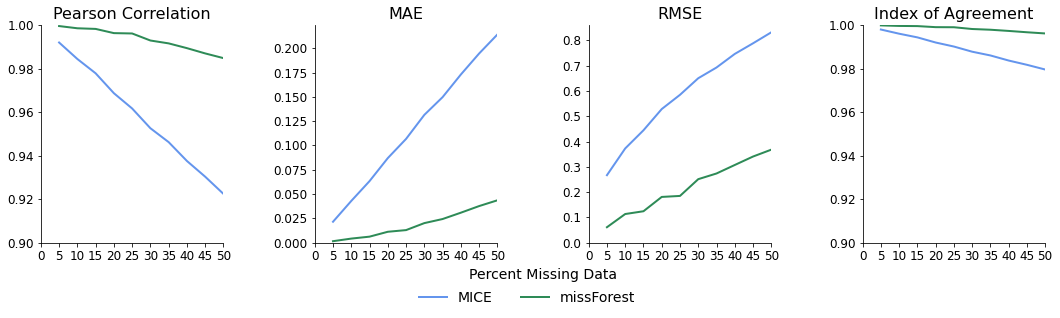

In [74]:
for param in ["co2","pm2p5_mass","tvoc","temperature_c","rh"]:
    res = imp.run_at_random(param=param)
    imp.compare_methods(res,save=True,annot=param)

<div class="alert-block alert alert-success">
    
missForest seems to be the best at least before looking into GANs
    
</div>